# Task 1-ChatBot 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
data1={"intents": [
        {"tag": "greeting",
         "patterns": ["Hi there", "How are you", "Is anyone there?","Hey","Hola", "Hello", "Good day"],
         "responses": ["Hello", "Good to see you again", "Hi there, how can I help?"],
         "context": [""]
        },
        {"tag": "goodbye",
         "patterns": ["Bye", "See you later", "Goodbye", "Nice chatting to you, bye", "Till next time"],
         "responses": ["See you!", "Have a nice day", "Bye! Come back again soon."],
         "context": [""]
        },
        {"tag": "ML",
         "patterns": ["What is machine learning"],
         "responses": ["Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy"],
         "context": [""]
        },
        {"tag": "powerful",
         "patterns": ["powerful country in the world?"],
         "responses": ["The United States of America is a North American nation that is the world's most dominant economic and military power."],
         "context": [""]
        },
        {"tag": "thanks",
         "patterns": ["Thanks", "Thank you", "That's helpful", "Awesome, thanks", "Thanks for helping me"],
         "responses": ["My pleasure", "You're Welcome"],
         "context": [""]
        },
        {"tag": "query",
         "patterns": ["What is big bang?"],
         "responses": ["The Big Bang theory is the prevailing cosmological model explaining the existence of the observable universe from the earliest known periods through its subsequent large-scale evolution."],
         "context": [""]
        } 
    ]
 }

In [3]:
tags=[]
patterns=[]
responses={}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['patterns']:
        patterns.append(lines)
        tags.append(intent['tag'])
    

In [4]:
data=pd.DataFrame({'patterns':patterns,'tags':tags})

In [5]:
data

,patterns,tags
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting
5,Hello,greeting
6,Good day,greeting
7,Bye,goodbye
8,See you later,goodbye
9,Goodbye,goodbye


In [6]:
data=data.sample(frac=1)

In [7]:
import string
data['patterns']=data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])


In [8]:
data['patterns']=data['patterns'].apply(lambda wrd:''.join(wrd))

In [9]:
data

,patterns,tags
8,see you later,goodbye
16,thats helpful,thanks
2,is anyone there,greeting
9,goodbye,goodbye
14,thanks,thanks
15,thank you,thanks
11,till next time,goodbye
4,hola,greeting
17,awesome thanks,thanks
7,bye,goodbye


In [10]:
tokenzier=Tokenizer(num_words=2000)
tokenzier.fit_on_texts(data['patterns'])
train=tokenzier.texts_to_sequences(data['patterns'])

In [11]:
#Apply padding
x_train=pad_sequences(train)

In [12]:
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [13]:
input_shape=x_train.shape[1]
input_shape

5

In [14]:
vocabulary=len(tokenzier.word_index)

In [15]:
output_length=le.classes_.shape[0]

In [16]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation='softmax')(x)
model=Model(i,x)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [18]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.7905 - accuracy: 0.0500
Epoch 2/200
1/1 [==============================] - 0s 15ms/step - loss: 1.7879 - accuracy: 0.0500
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 1.7853 - accuracy: 0.1000
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 1.7827 - accuracy: 0.3000
Epoch 5/200
1/1 [==============================] - 0s 14ms/step - loss: 1.7801 - accuracy: 0.4500
Epoch 6/200
1/1 [==============================] - 0s 14ms/step - loss: 1.7775 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 1.7749 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 1.7722 - accuracy: 0.4500
Epoch 9/200
1/1 [==============================] - 0s 20ms/step - loss: 1.7695 - accuracy: 0.4500
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 1.7668 - accuracy: 0.4500
Epoch 11/200
1/1 [===

1/1 [==============================] - 0s 12ms/step - loss: 1.2550 - accuracy: 0.4500
Epoch 84/200
1/1 [==============================] - 0s 13ms/step - loss: 1.2486 - accuracy: 0.4500
Epoch 85/200
1/1 [==============================] - 0s 14ms/step - loss: 1.2422 - accuracy: 0.4500
Epoch 86/200
1/1 [==============================] - 0s 12ms/step - loss: 1.2358 - accuracy: 0.4500
Epoch 87/200
1/1 [==============================] - 0s 14ms/step - loss: 1.2294 - accuracy: 0.4500
Epoch 88/200
1/1 [==============================] - 0s 12ms/step - loss: 1.2231 - accuracy: 0.4500
Epoch 89/200
1/1 [==============================] - 0s 12ms/step - loss: 1.2167 - accuracy: 0.4500
Epoch 90/200
1/1 [==============================] - 0s 14ms/step - loss: 1.2103 - accuracy: 0.4500
Epoch 91/200
1/1 [==============================] - 0s 13ms/step - loss: 1.2039 - accuracy: 0.4500
Epoch 92/200
1/1 [==============================] - 0s 12ms/step - loss: 1.1975 - accuracy: 0.4500
Epoch 93/200
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 0.7204 - accuracy: 0.8500
Epoch 166/200
1/1 [==============================] - 0s 13ms/step - loss: 0.7146 - accuracy: 0.8500
Epoch 167/200
1/1 [==============================] - 0s 13ms/step - loss: 0.7089 - accuracy: 0.8500
Epoch 168/200
1/1 [==============================] - 0s 12ms/step - loss: 0.7032 - accuracy: 0.8500
Epoch 169/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6975 - accuracy: 0.8500
Epoch 170/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6919 - accuracy: 0.8500
Epoch 171/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6862 - accuracy: 0.8500
Epoch 172/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6807 - accuracy: 0.8500
Epoch 173/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6751 - accuracy: 0.8500
Epoch 174/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6696 - accuracy: 0.8500
Epoch 175/200


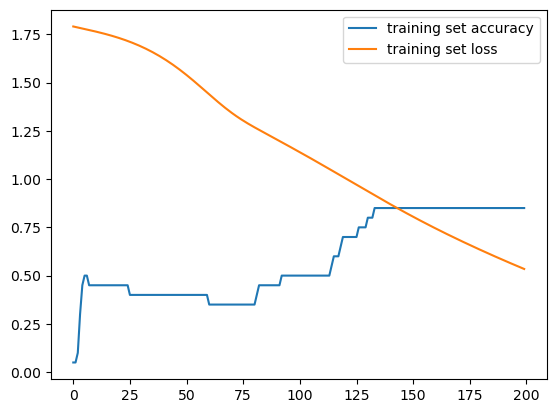

In [19]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
import random
while True:
    texts_p=[]
    prediction_input=input('You : ')
 
    prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input=''.join(prediction_input)
    texts_p.append(prediction_input)

    prediction_input=tokenzier.texts_to_sequences(texts_p)
    prediction_input=np.array(prediction_input).reshape(-1)
    prediction_input=pad_sequences([prediction_input],input_shape)

    output=model.predict(prediction_input)
    output=output.argmax()
 
    response_tag=le.inverse_transform([output])[0]
    print("chatbot : ",random.choice(responses[response_tag]))
    if response_tag=='goodbye':
        break

You : Hellow
1/1 [==============================] - 1s 837ms/step
chatbot :  Hello
You : powerful country in the world
1/1 [==============================] - 0s 37ms/step
chatbot :  The United States of America is a North American nation that is the world's most dominant economic and military power.
You : what is machine learning
1/1 [==============================] - 0s 29ms/step
chatbot :  Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy
You : what is big bang theory
1/1 [==============================] - 0s 31ms/step
chatbot :  The Big Bang theory is the prevailing cosmological model explaining the existence of the observable universe from the earliest known periods through its subsequent large-scale evolution.
You : thanku
1/1 [==============================] - 0s 34ms/step
chatbot :  Good to see you again
